In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'  #plot내 글씨를 선명하게 해주는 옵션

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [2]:
data=pd.read_csv("C:/Users/Administrator/Downloads/stock_sk.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Change,5MA,5Disparity,20MA,...,ADX,MACD,TRIX,CCI,Institutional_trading,Corporate_trading,Individual_trading,Foreign_trading,Short_volume,Short_left
0,2019-01-02,61300,61400,60000,60600,1934295,0.001653,60640.0,0.999340,63490.0,...,20.921251,-2398.314386,-0.366967,-61.571125,-5544,-272,-308177,313993,283672,1355760
1,2019-01-03,60200,60300,57500,57700,3337621,-0.047855,60100.0,0.960067,62850.0,...,21.557054,-2534.924679,-0.382273,-101.714849,-134388,-8599,473844,-330857,472084,1579206
2,2019-01-04,57500,58500,56700,58300,3388087,0.010399,59740.0,0.975896,62315.0,...,22.294059,-2565.204257,-0.397138,-111.192333,214278,-15952,-337039,138713,114527,1432217
3,2019-01-07,59000,59700,58400,58700,2273750,0.006861,59160.0,0.992224,61840.0,...,22.588606,-2527.785644,-0.410526,-80.542906,124196,16124,-7434,-132886,203543,1326974
4,2019-01-08,57900,60500,57600,59200,3062192,0.008518,58900.0,1.005093,61500.0,...,22.868425,-2429.776353,-0.421551,-72.058895,188124,-5496,-547042,364414,211532,1400451


In [4]:
df = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change']]

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Change
0,2019-01-02,61300,61400,60000,60600,1934295,0.001653
1,2019-01-03,60200,60300,57500,57700,3337621,-0.047855
2,2019-01-04,57500,58500,56700,58300,3388087,0.010399
3,2019-01-07,59000,59700,58400,58700,2273750,0.006861
4,2019-01-08,57900,60500,57600,59200,3062192,0.008518


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1274 non-null   object 
 1   Open    1274 non-null   int64  
 2   High    1274 non-null   int64  
 3   Low     1274 non-null   int64  
 4   Close   1274 non-null   int64  
 5   Volume  1274 non-null   int64  
 6   Change  1274 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 69.8+ KB


In [7]:
# 전일 종가를 나타내는 새로운 열 생성
new_df = df.copy()  # 데이터프레임 복사
new_df['Previous_Close'] = new_df['Close'].shift(1)  # 전일 종가는 당일 종가의 이전 행에 위치합니다

# 전일 종가와 당일 종가를 비교하여 상승(1) 또는 하락(0)을 나타내는 새로운 열 생성
new_df['Close_Comparison'] = 0  # 초기값을 0로 설정

# 상승한 경우에는 1, 하락한 경우에는 -1으로 할당
new_df.loc[new_df['Close'] > new_df['Previous_Close'], 'Close_Comparison'] = 1
new_df.loc[new_df['Close'] < new_df['Previous_Close'], 'Close_Comparison'] = -1

In [8]:
new_df.head()

,Date,Open,High,Low,Close,Volume,Change,Previous_Close,Close_Comparison
0,2019-01-02,61300,61400,60000,60600,1934295,0.001653,NaN,0
1,2019-01-03,60200,60300,57500,57700,3337621,-0.047855,60600.0,-1
2,2019-01-04,57500,58500,56700,58300,3388087,0.010399,57700.0,1
3,2019-01-07,59000,59700,58400,58700,2273750,0.006861,58300.0,1
4,2019-01-08,57900,60500,57600,59200,3062192,0.008518,58700.0,1


In [9]:
new_df.drop(columns=['Previous_Close'], inplace=True)

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1274 non-null   object 
 1   Open              1274 non-null   int64  
 2   High              1274 non-null   int64  
 3   Low               1274 non-null   int64  
 4   Close             1274 non-null   int64  
 5   Volume            1274 non-null   int64  
 6   Change            1274 non-null   float64
 7   Close_Comparison  1274 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 79.8+ KB


In [11]:
new_df.isna().sum(axis=0).sort_values()

Date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
Change              0
Close_Comparison    0
dtype: int64

In [12]:
new_df[new_df.duplicated()] #중복행 확인

,Date,Open,High,Low,Close,Volume,Change,Close_Comparison


Text(0.5, 1.0, 'correlation heatmap')

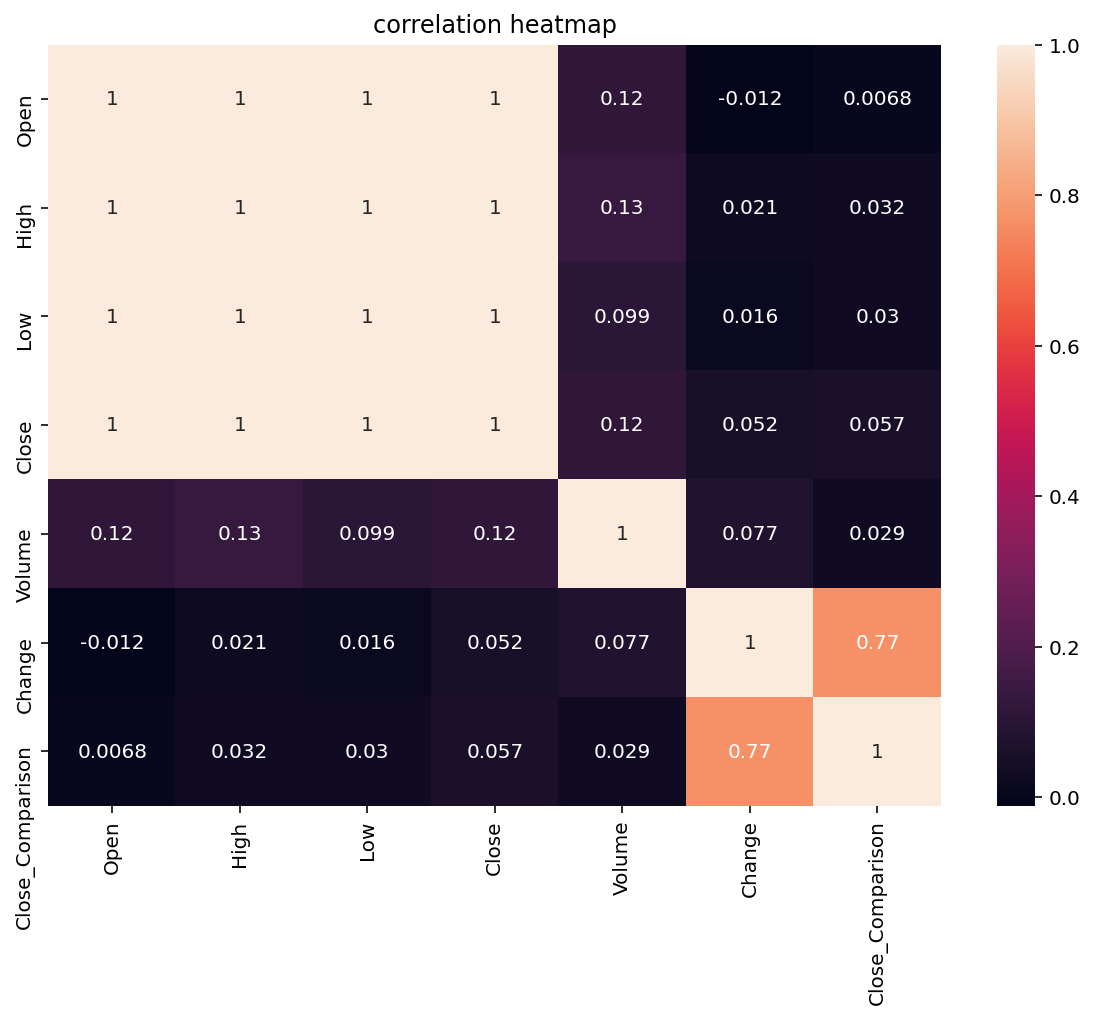

In [13]:
plt.figure(figsize=(10,7)) #사이즈조절
sns.heatmap(new_df.corr(),annot=True)
plt.title('correlation heatmap') #상관계수 행렬 히트랩

In [14]:
new_df["Close_Comparison"].value_counts()

-1    610
 1    604
 0     60
Name: Close_Comparison, dtype: int64

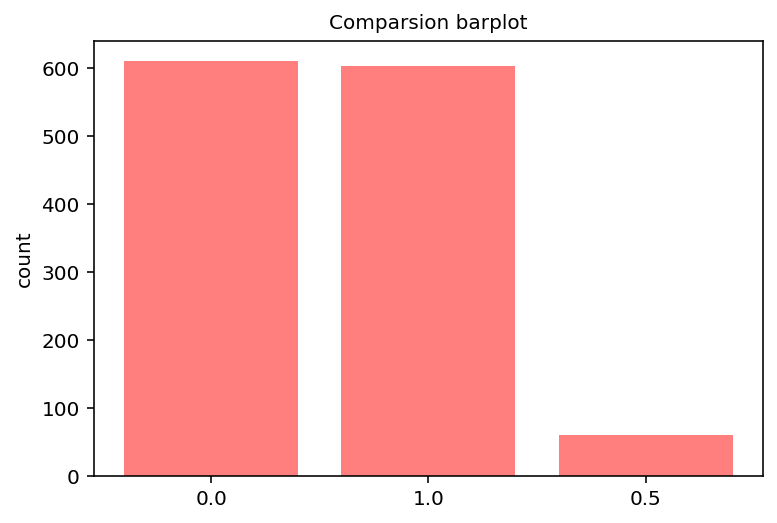

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Comparison barplot')

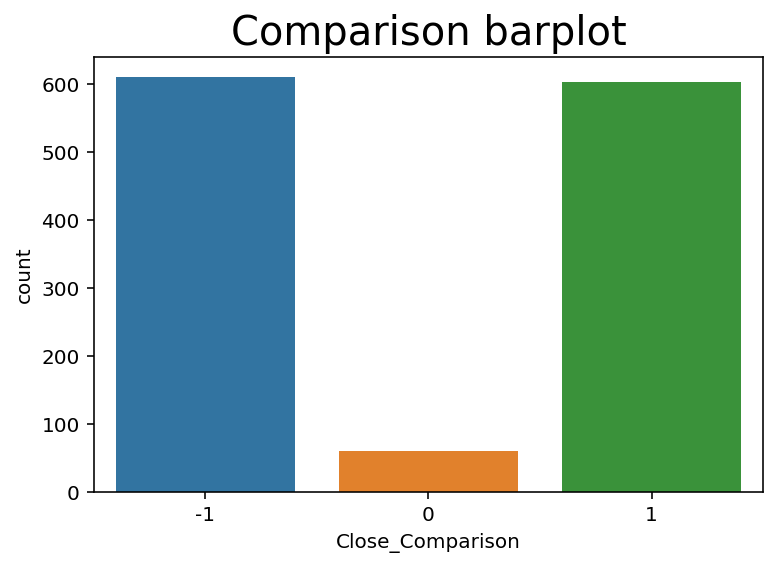

In [15]:
#Close_Comparison

plt.bar(['0.0','1.0','0.5'],new_df['Close_Comparison'].value_counts().values,color='red',alpha=0.5)
plt.title('Comparsion barplot',fontsize=10)
plt.ylabel('count')
plt.show()

#sns 라이브러리
sns.countplot(new_df['Close_Comparison'])
plt.title('Comparison barplot',fontsize=20)

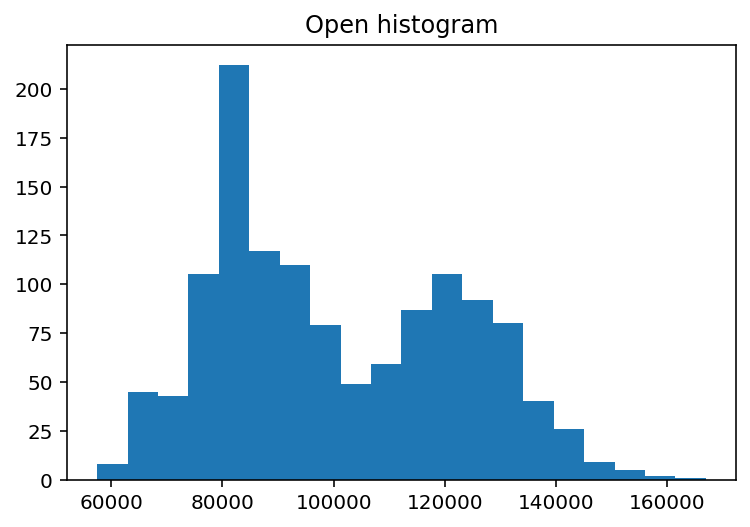

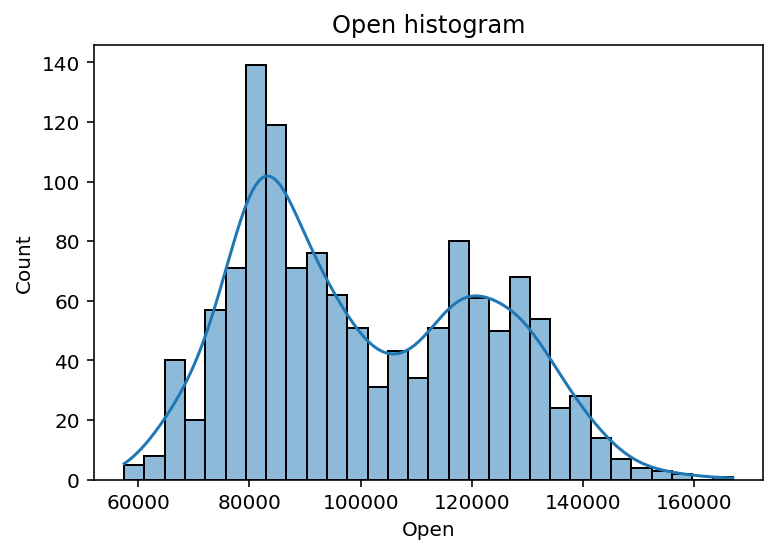

<AxesSubplot:xlabel='Close_Comparison', ylabel='Open'>

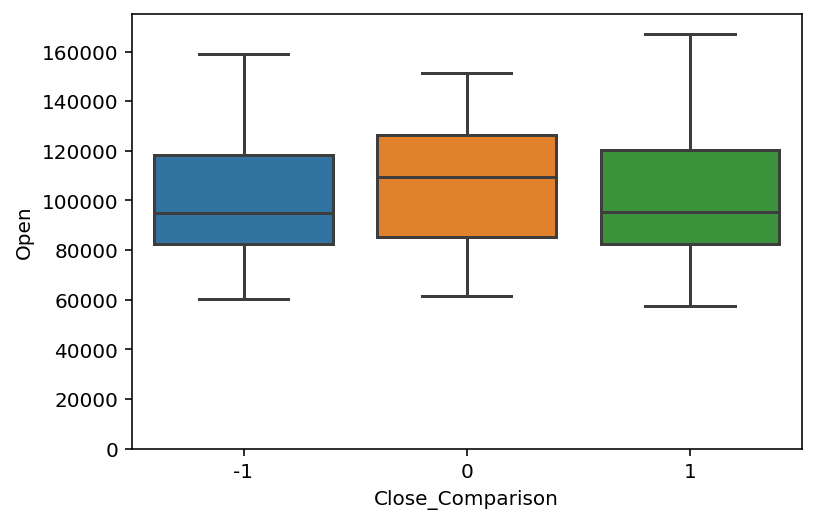

In [16]:
# Open

plt.hist(new_df.Open,bins=20)
plt.title('Open histogram',fontsize=12)
plt.show()
sns.histplot(new_df['Open'],bins=30,kde=True) #sns라이브러리
plt.title('Open histogram',fontsize=12)
plt.show()
sns.kdeplot(new_df.Open) #sns 라이브러리로 밀도함수

#종가 비교와 시가 관계 살펴보기
sns.boxplot(x='Close_Comparison',y='Open',data=new_df)

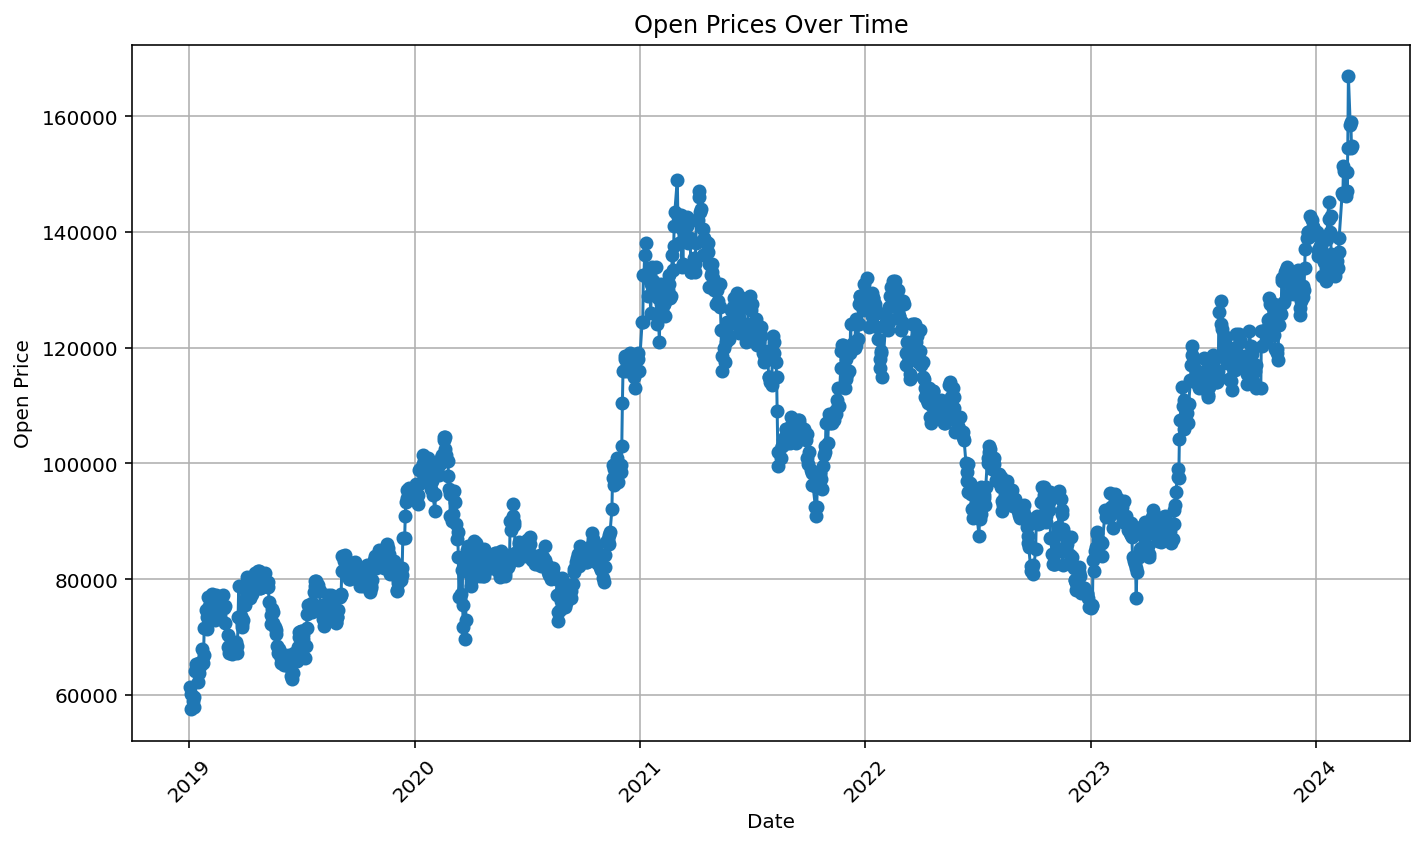

In [17]:
# Date를 인덱스로 설정
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.set_index('Date', inplace=True)

# Open 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Open'], marker='o', linestyle='-')
plt.title('Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
plt.show()

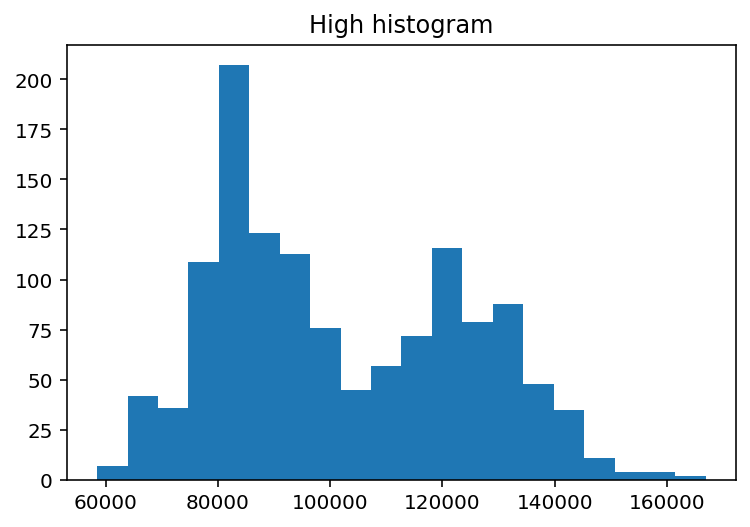

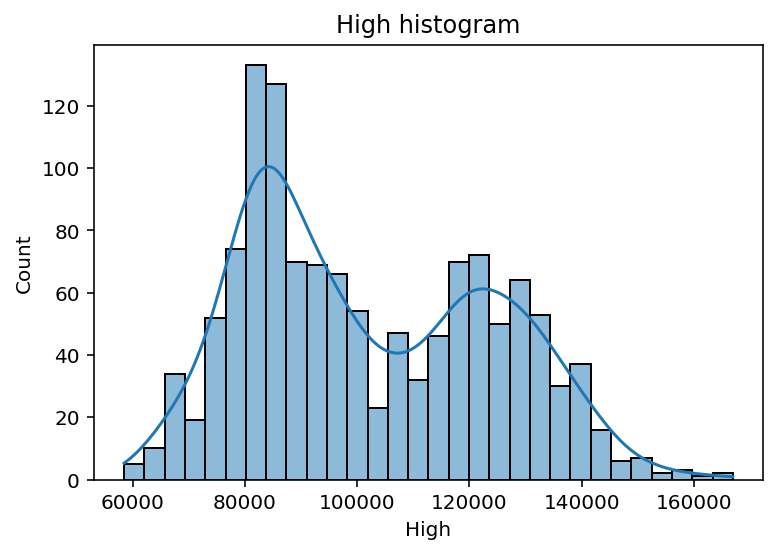

<AxesSubplot:xlabel='Close_Comparison', ylabel='High'>

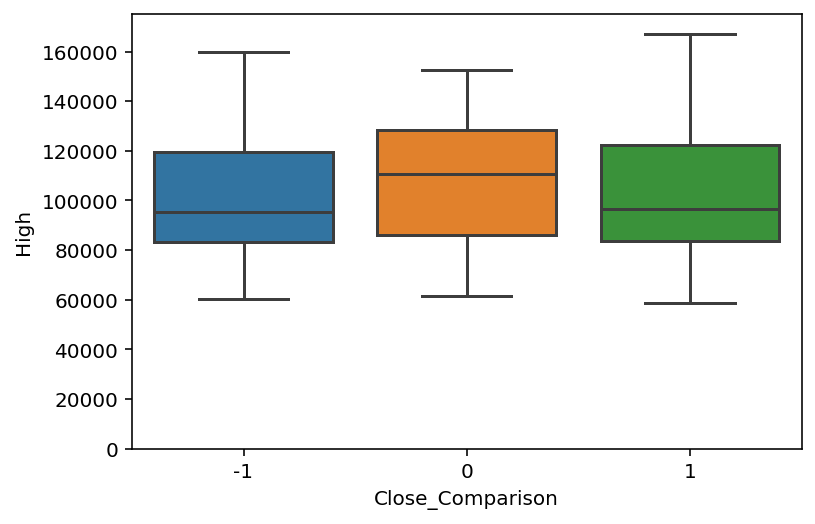

In [18]:
# High

plt.hist(new_df.High,bins=20)
plt.title('High histogram',fontsize=12)
plt.show()
sns.histplot(new_df['High'],bins=30,kde=True) #sns라이브러리
plt.title('High histogram',fontsize=12)
plt.show()
sns.kdeplot(new_df.High) #sns 라이브러리로 밀도함수

#종가 비교와 고가 관계 살펴보기
sns.boxplot(x='Close_Comparison',y='High',data=new_df)

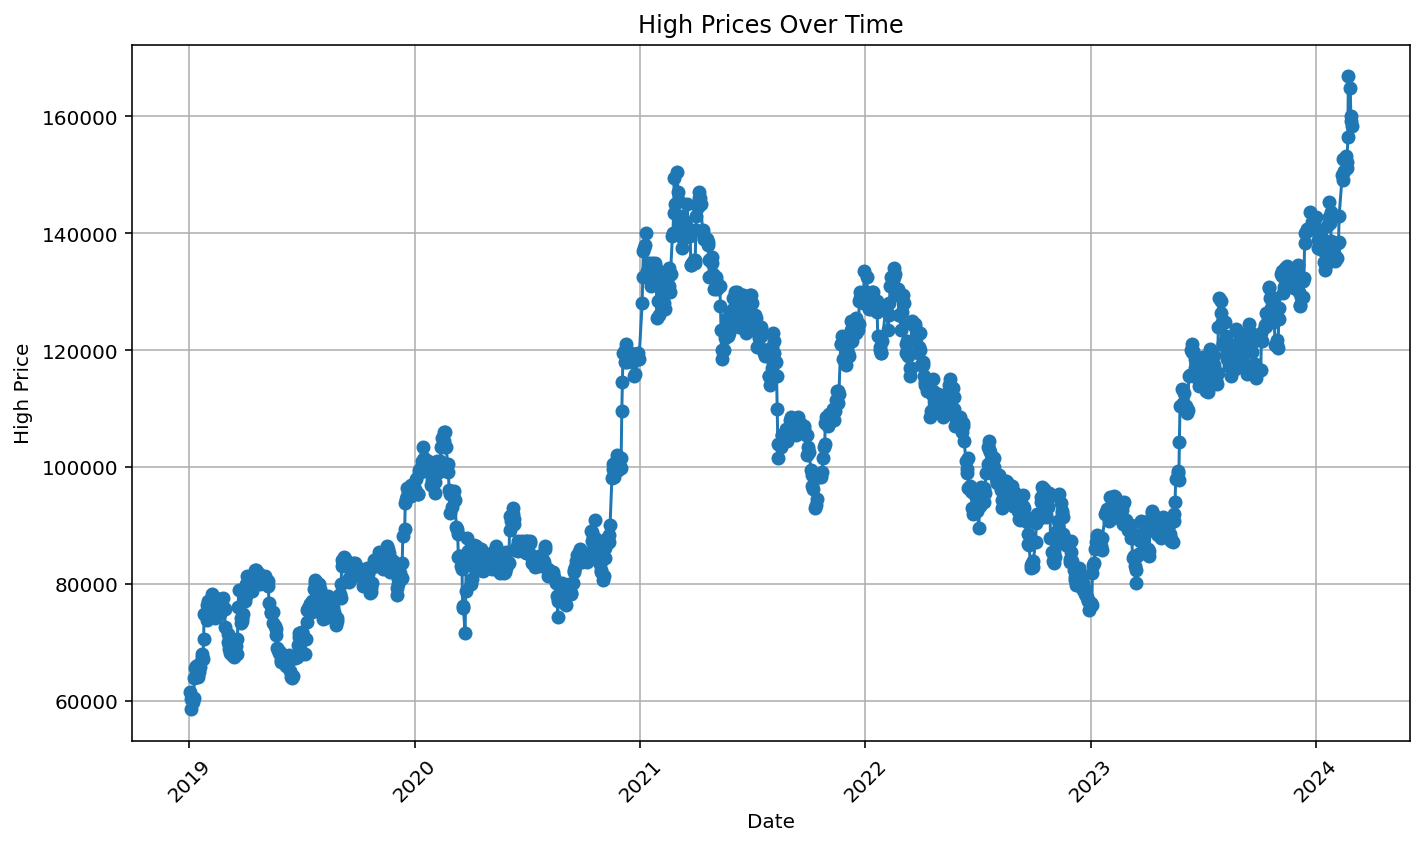

In [19]:
# High 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['High'], marker='o', linestyle='-')
plt.title('High Prices Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.grid(True)
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
plt.show()

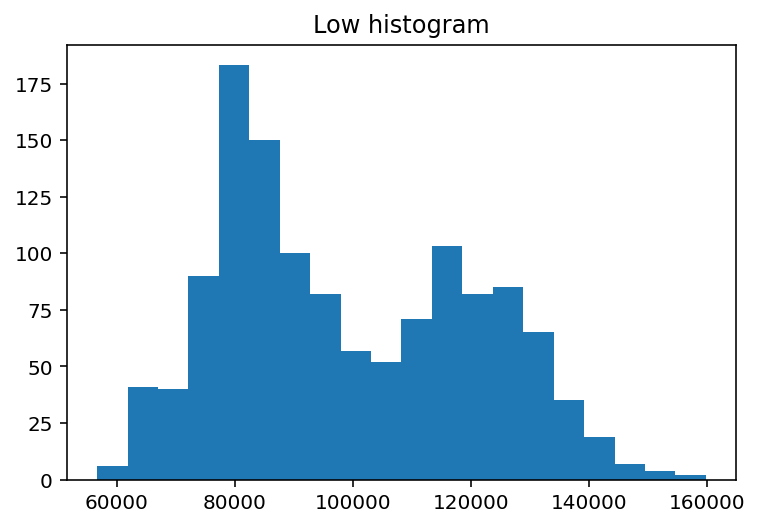

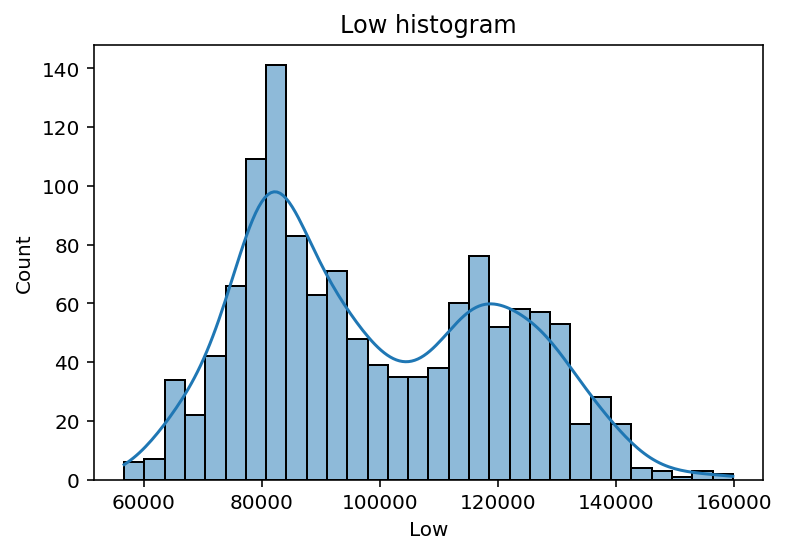

<AxesSubplot:xlabel='Close_Comparison', ylabel='Low'>

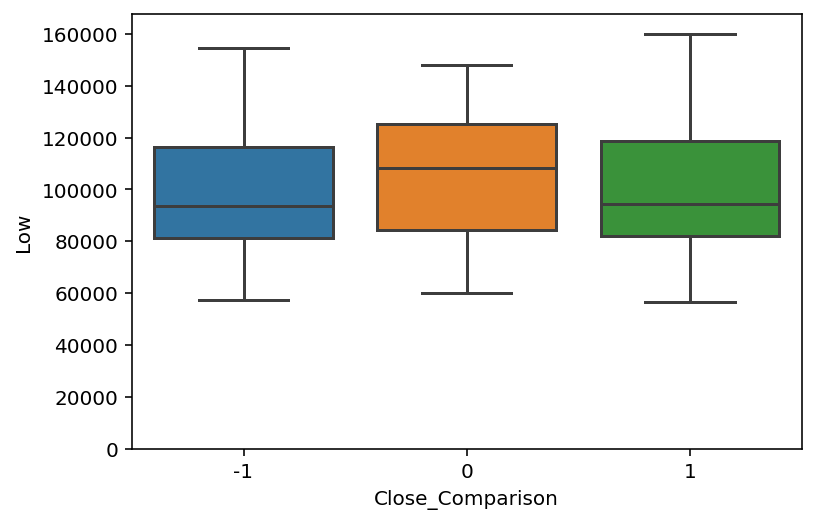

In [20]:
# Low

plt.hist(new_df.Low,bins=20)
plt.title('Low histogram',fontsize=12)
plt.show()
sns.histplot(new_df['Low'],bins=30,kde=True) #sns라이브러리
plt.title('Low histogram',fontsize=12)
plt.show()
sns.kdeplot(new_df.Low) #sns 라이브러리로 밀도함수

#종가 비교와 저가 관계 살펴보기
sns.boxplot(x='Close_Comparison',y='Low',data=new_df)

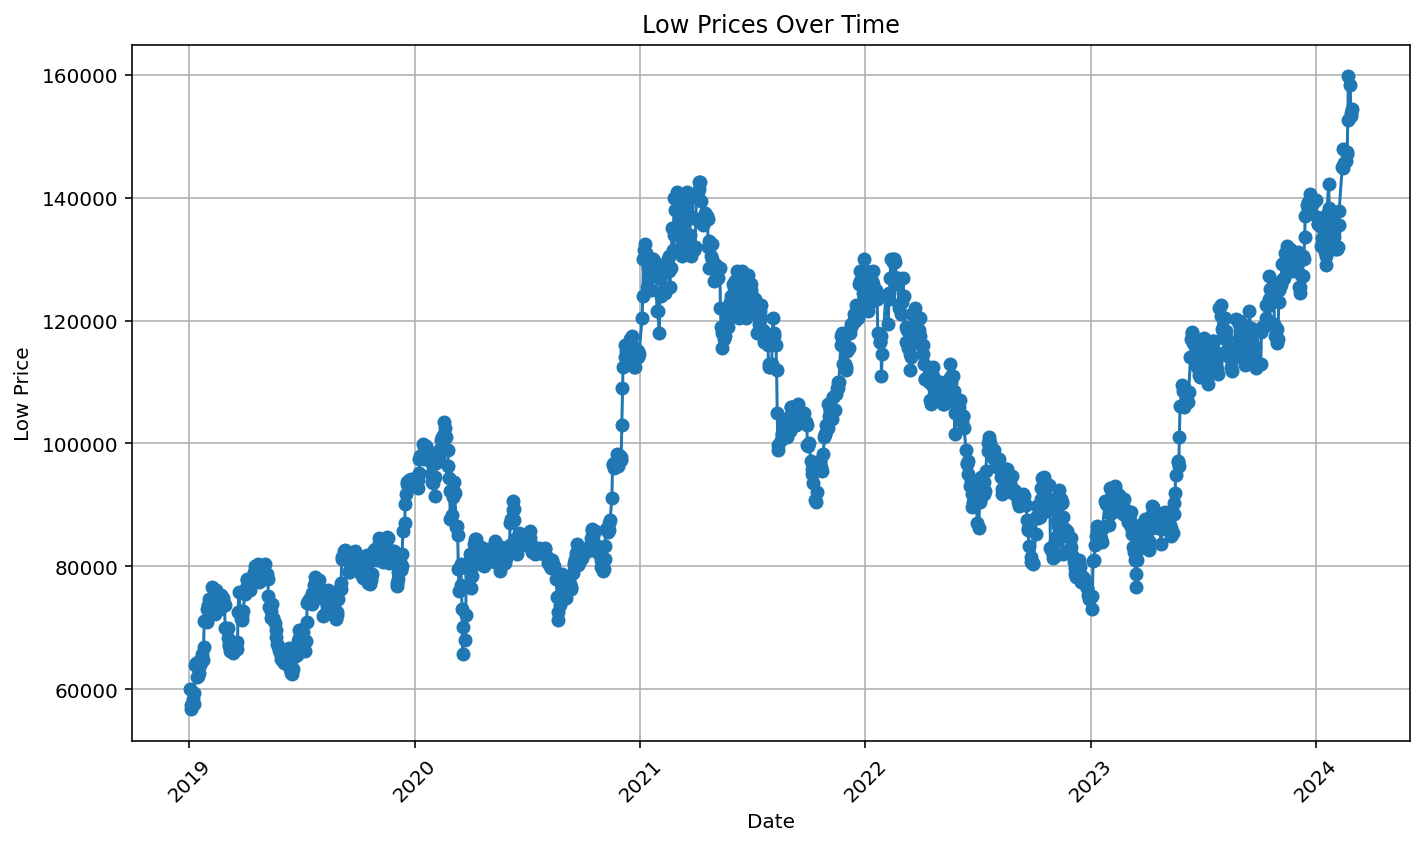

In [21]:
# Low 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Low'], marker='o', linestyle='-')
plt.title('Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.grid(True)
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
plt.show()

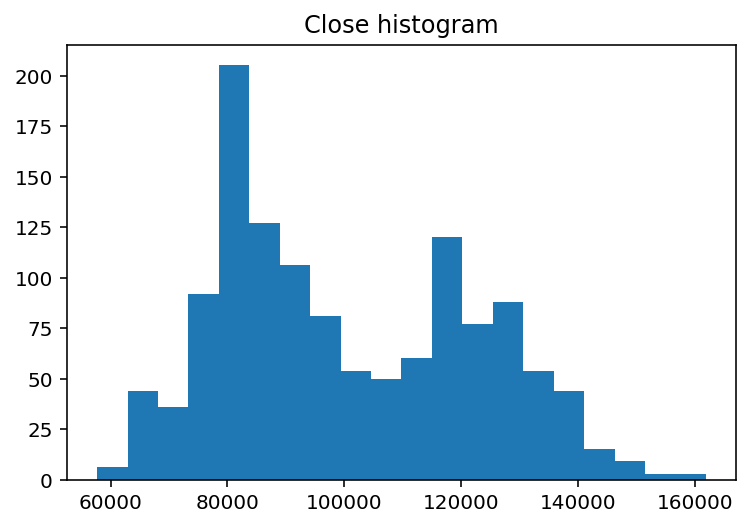

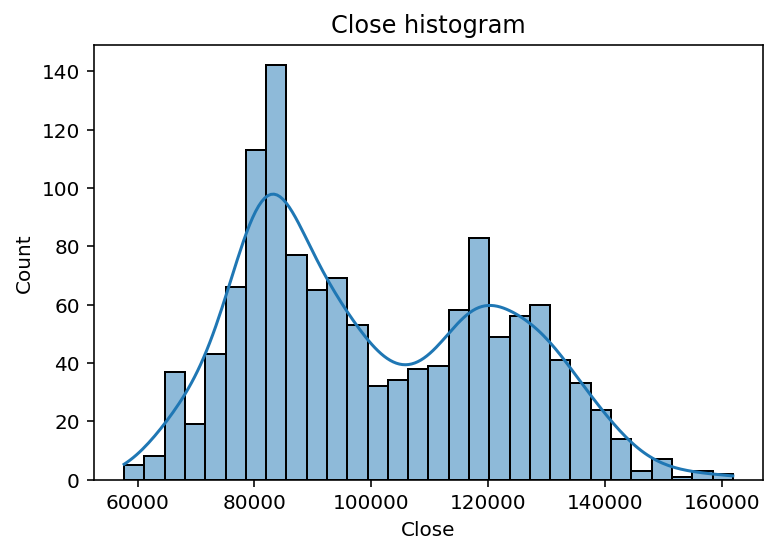

<AxesSubplot:xlabel='Close_Comparison', ylabel='Close'>

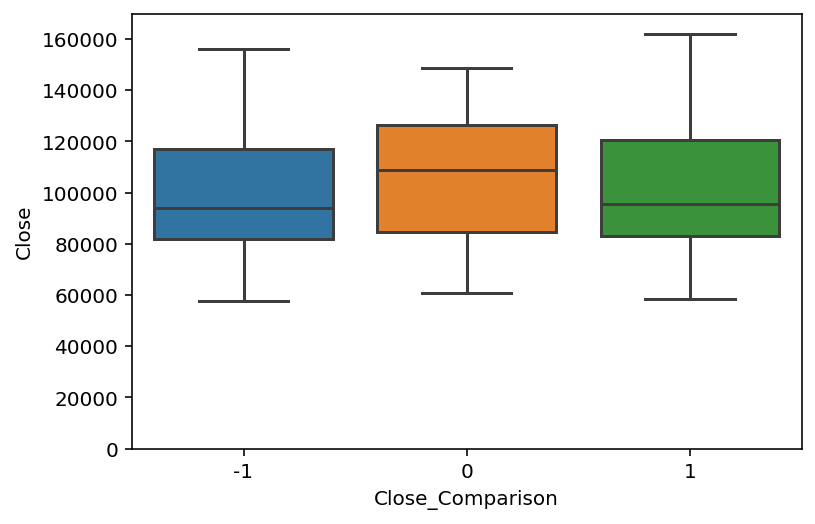

In [22]:
# Close

plt.hist(new_df.Close,bins=20)
plt.title('Close histogram',fontsize=12)
plt.show()
sns.histplot(new_df['Close'],bins=30,kde=True) #sns라이브러리
plt.title('Close histogram',fontsize=12)
plt.show()
sns.kdeplot(new_df.Close) #sns 라이브러리로 밀도함수

#종가 비교와 종가 관계 살펴보기
sns.boxplot(x='Close_Comparison',y='Close',data=new_df)

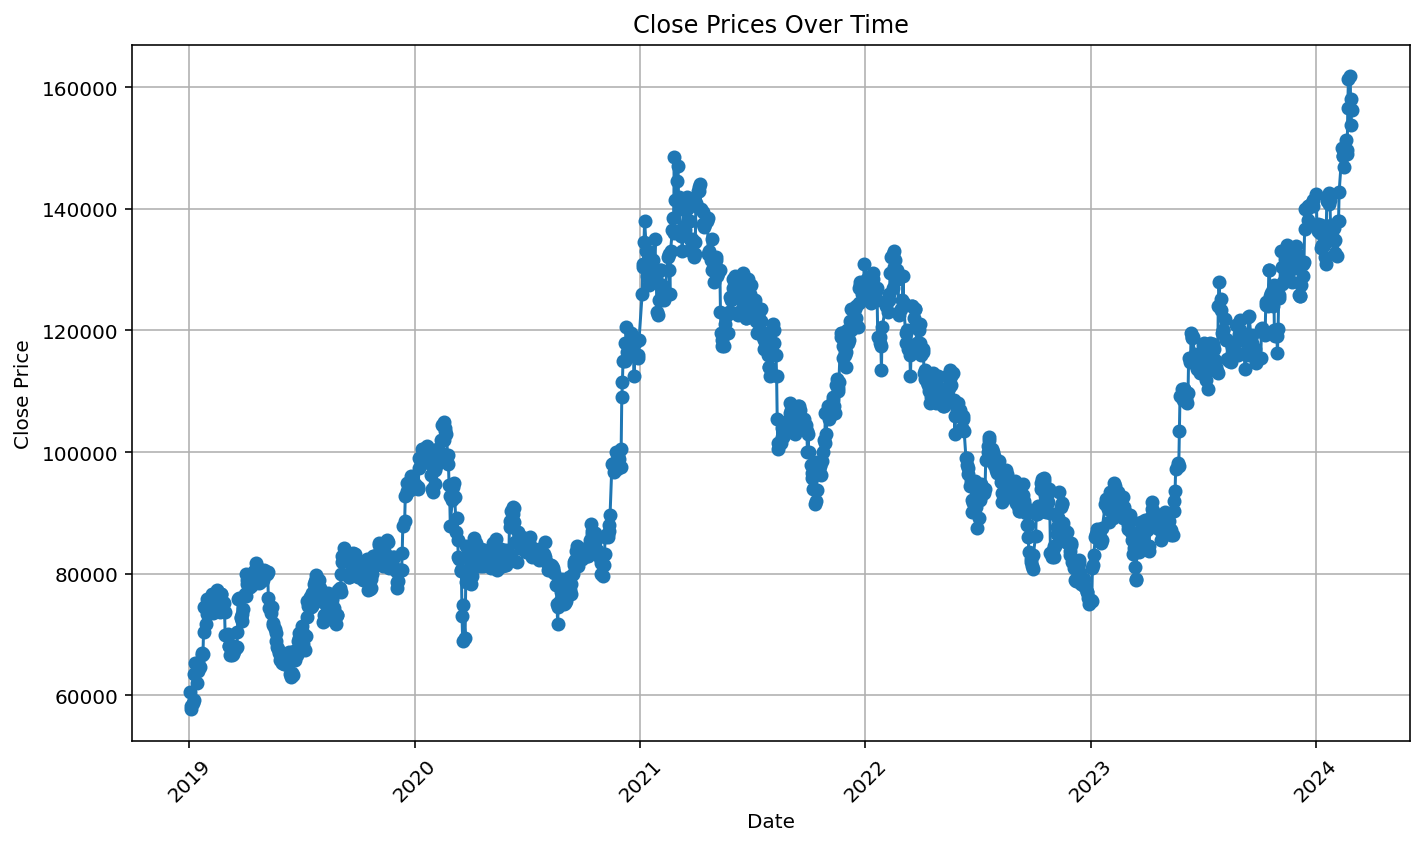

In [23]:
# Close 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Close'], marker='o', linestyle='-')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
plt.show()

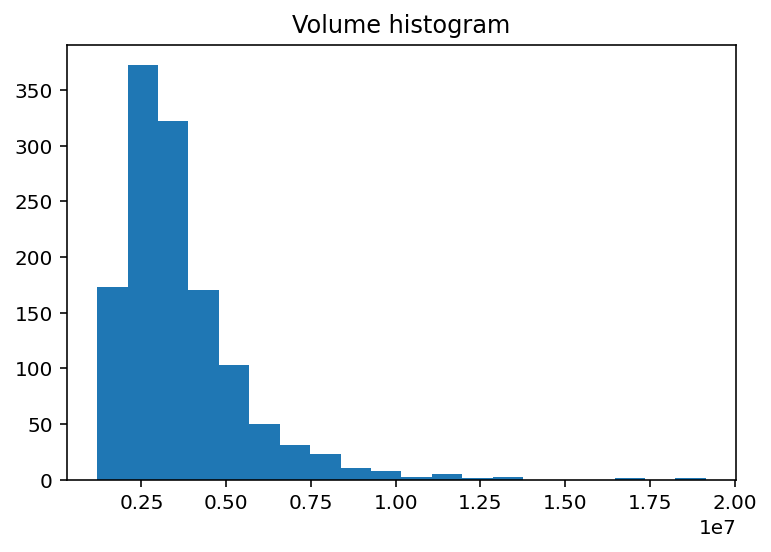

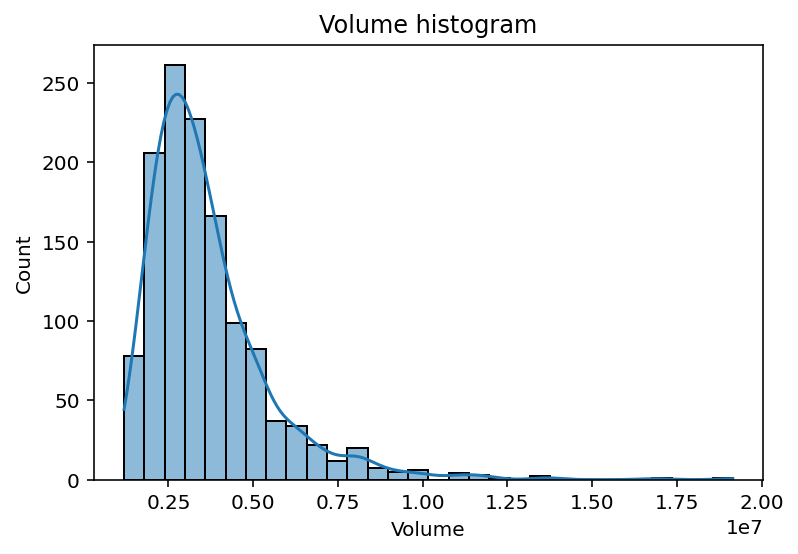

<AxesSubplot:xlabel='Close_Comparison', ylabel='Volume'>

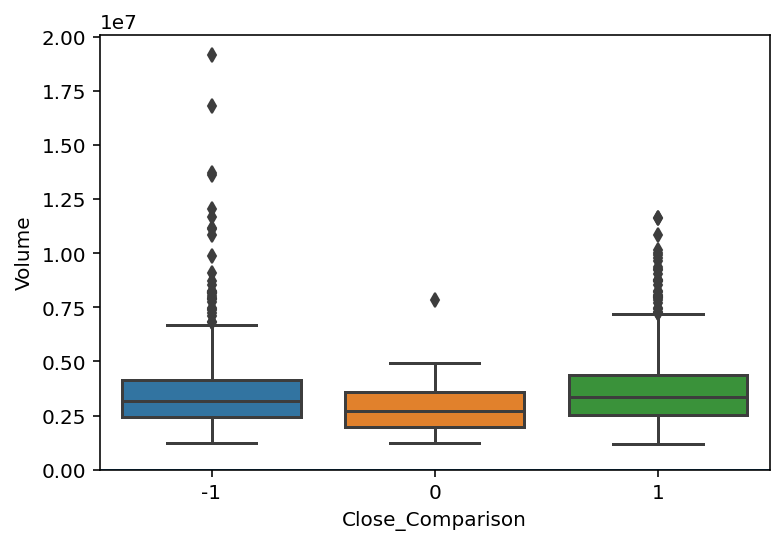

In [24]:
# Volume

plt.hist(new_df.Volume,bins=20)
plt.title('Volume histogram',fontsize=12)
plt.show()
sns.histplot(new_df['Volume'],bins=30,kde=True) #sns라이브러리
plt.title('Volume histogram',fontsize=12)
plt.show()
sns.kdeplot(new_df.Volume) #sns 라이브러리로 밀도함수

#종가 비교와 거래량 관계 살펴보기
sns.boxplot(x='Close_Comparison',y='Volume',data=new_df)

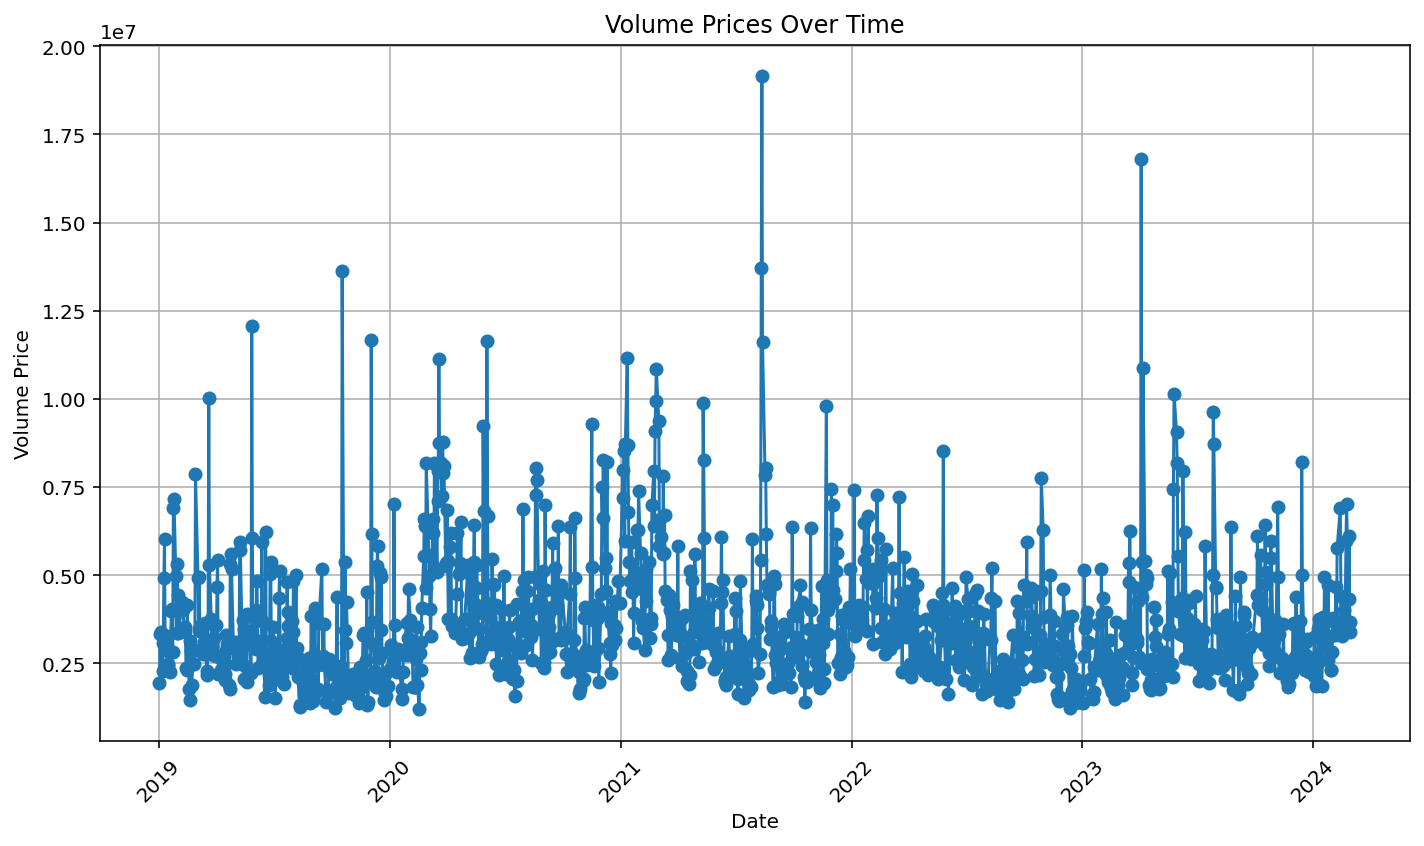

In [25]:
# Volume 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Volume'], marker='o', linestyle='-')
plt.title('Volume Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Price')
plt.grid(True)
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
plt.show()

In [26]:
new_df.Volume.describe()

count    1.274000e+03
mean     3.640113e+06
std      1.815068e+06
min      1.190162e+06
25%      2.461020e+06
50%      3.206072e+06
75%      4.268057e+06
max      1.915065e+07
Name: Volume, dtype: float64

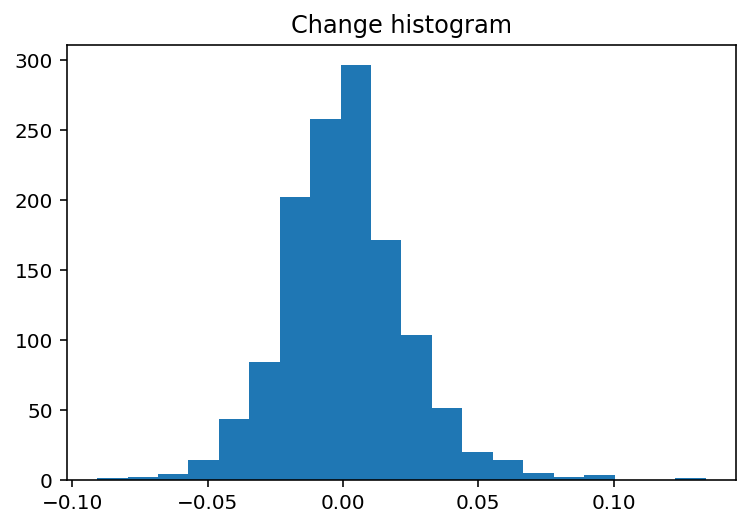

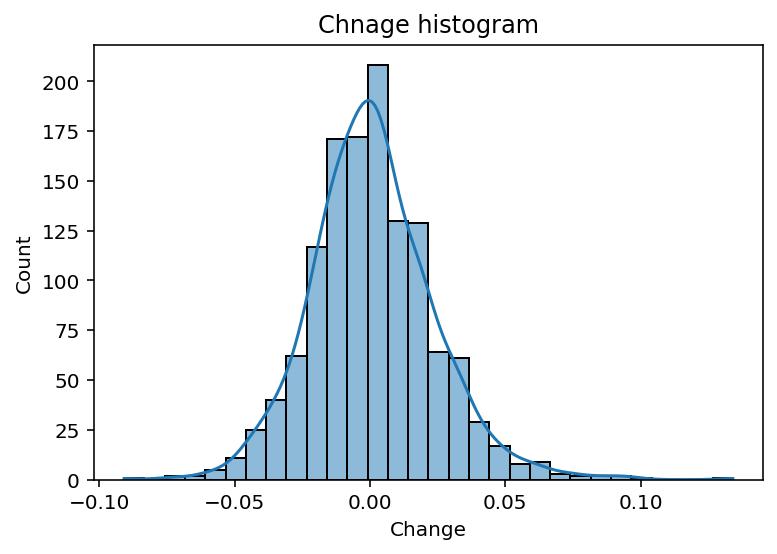

<AxesSubplot:xlabel='Close_Comparison', ylabel='Change'>

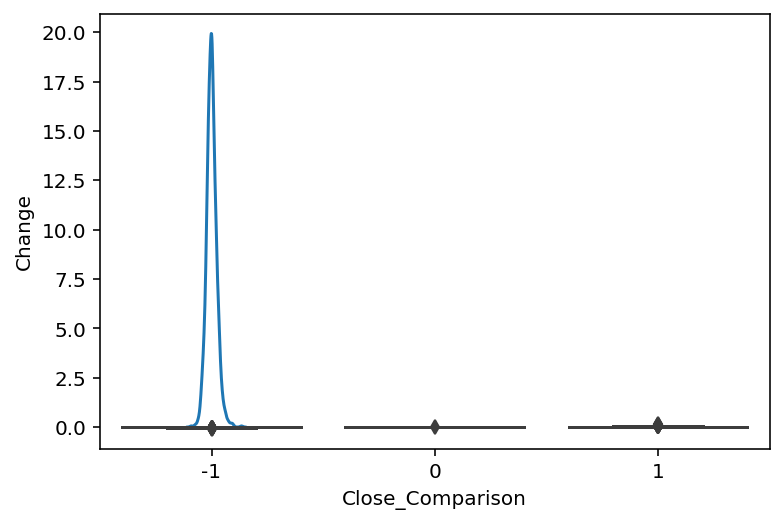

In [27]:
# Change

plt.hist(new_df.Change,bins=20)
plt.title('Change histogram',fontsize=12)
plt.show()
sns.histplot(new_df['Change'],bins=30,kde=True) #sns라이브러리
plt.title('Chnage histogram',fontsize=12)
plt.show()
sns.kdeplot(new_df.Change) #sns 라이브러리로 밀도함수

#종가 비교와 변화율 관계 살펴보기
sns.boxplot(x='Close_Comparison',y='Change',data=new_df)

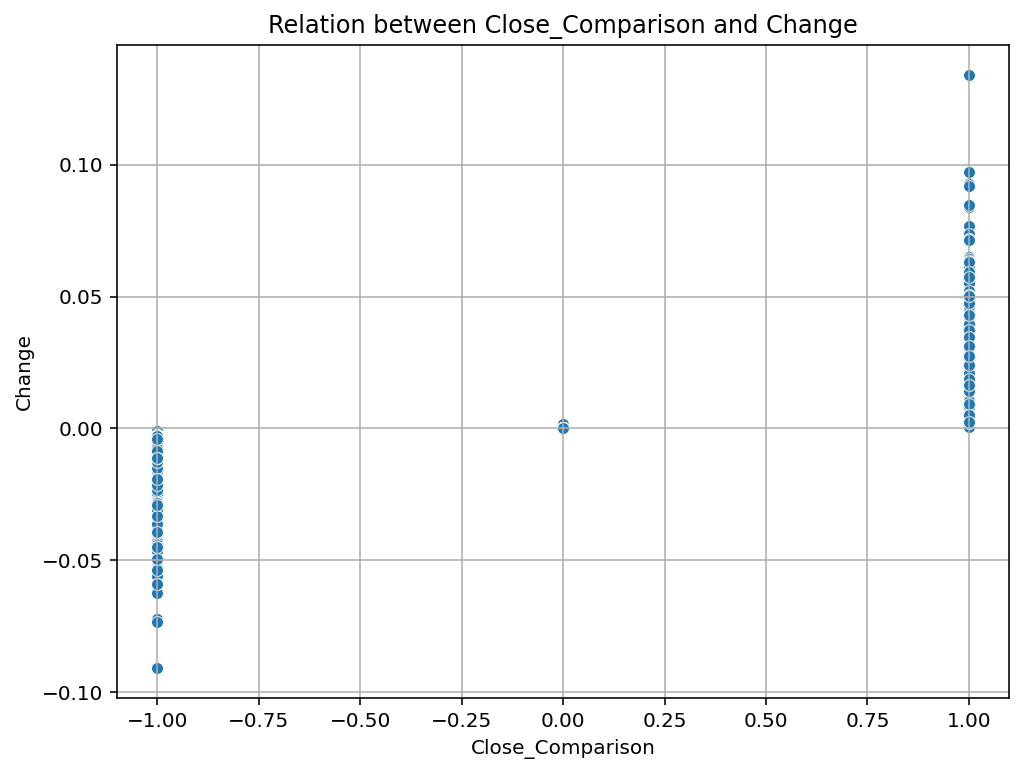

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Close_Comparison', y='Change', data=new_df)
plt.title('Relation between Close_Comparison and Change')
plt.xlabel('Close_Comparison')
plt.ylabel('Change')
plt.grid(True)
plt.show()

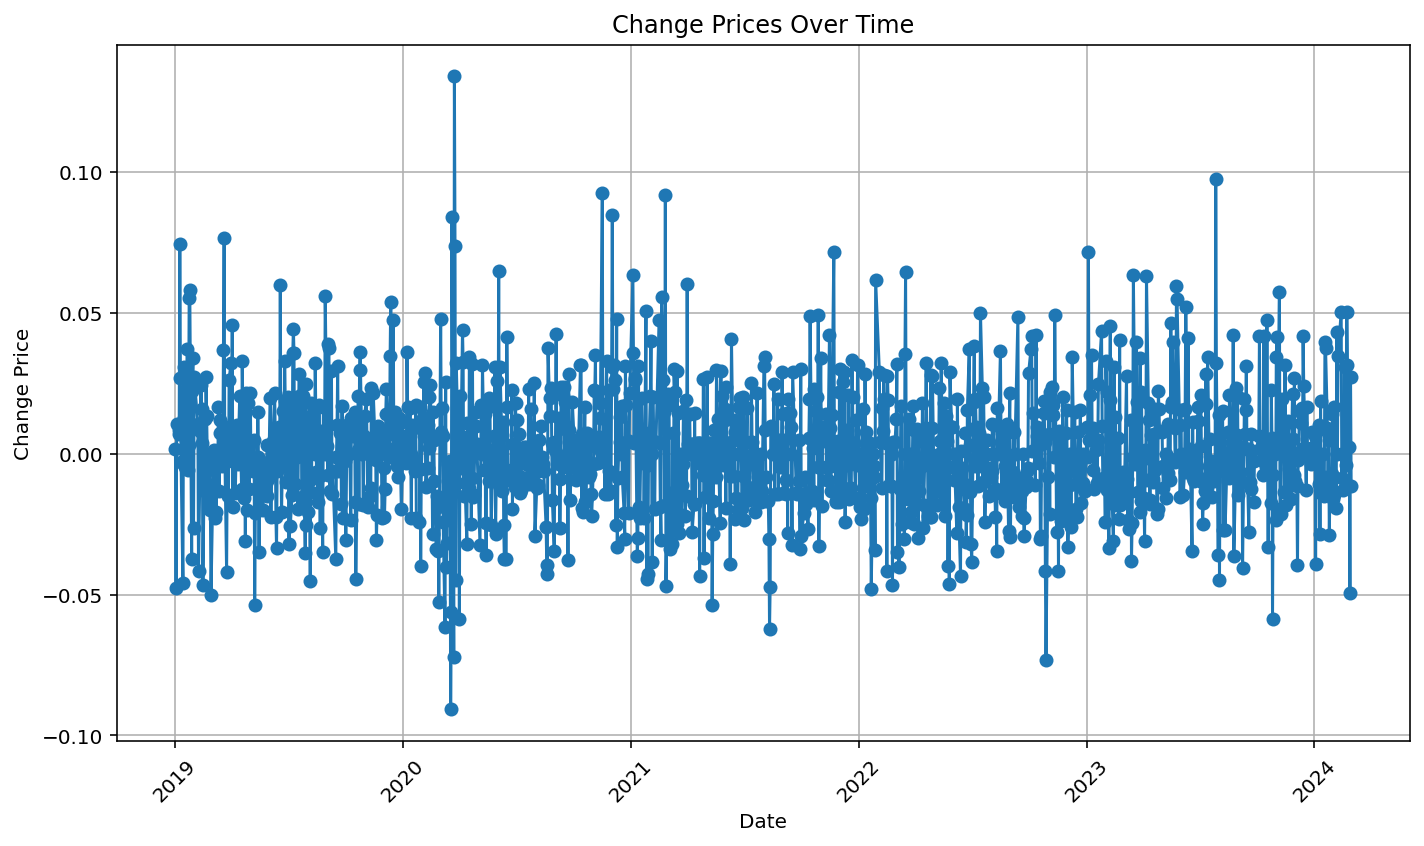

In [29]:
# Change 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Change'], marker='o', linestyle='-')
plt.title('Change Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Change Price')
plt.grid(True)
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
plt.show()

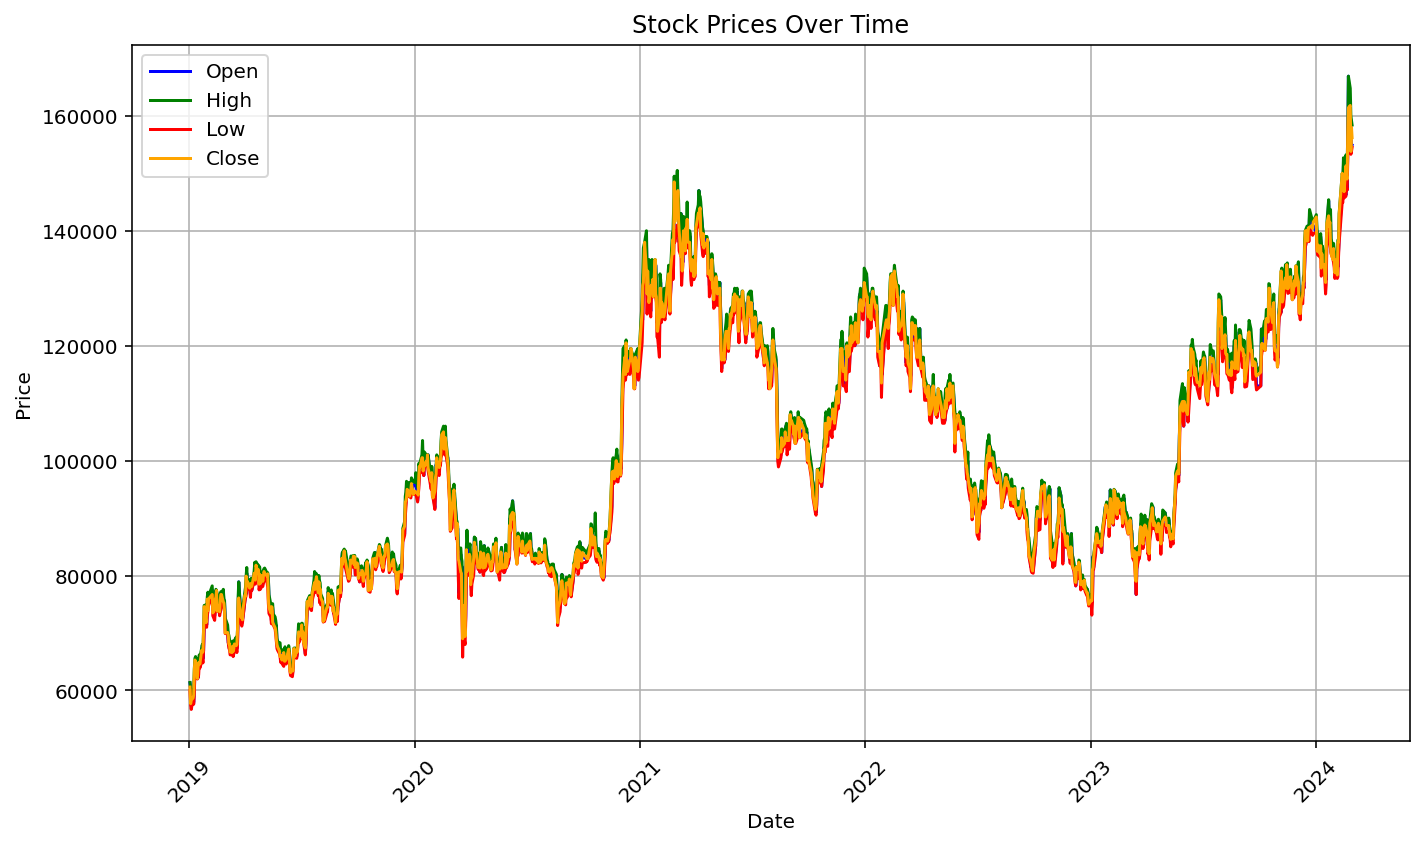

In [30]:
#시가, 고가, 저가, 종가

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 시가, 고가, 저가, 종가 그래프 그리기
plt.plot(new_df.index, new_df['Open'], label='Open', color='blue')
plt.plot(new_df.index, new_df['High'], label='High', color='green')
plt.plot(new_df.index, new_df['Low'], label='Low', color='red')
plt.plot(new_df.index, new_df['Close'], label='Close', color='orange')

# 그래프 제목, 축 라벨 설정
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.legend()  # 범례 추가
plt.grid(True)  # 그리드 추가

# 그래프 표시
plt.tight_layout()
plt.show()

In [31]:
# 독립변수와 종속변수 나누기
X = new_df[['Open', 'High', 'Low', 'Volume', 'Change']]  # 특성 데이터
y = new_df['Close_Comparison']  # 타겟 데이터

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## 모델

### decision tree

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

### 로지스틱

In [33]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

### 랜덤 포레스트 모델

In [34]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

### 모델 평가

In [35]:
# 모델 평가 함수 정의
def model_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred, labels=[1, 0])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None, labels=[1, 0])
    recall = recall_score(y_test, y_pred, average=None, labels=[1, 0])
    F1 = f1_score(y_test, y_pred, average=None, labels=[1, 0])
    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: ", precision)
    print("재현율: ", recall)
    print("F1: ", F1)
    print(classification_report(y_test, y_pred, labels=[1, 0]))


In [36]:
# 각 모델의 평가
print("로지스틱 회귀 모델 평가")
model_eval(y_test, y_pred_logistic)
print("\n의사결정 트리 모델 평가")
model_eval(y_test, y_pred_decision_tree)
print("\n랜덤 포레스트 모델 평가")
model_eval(y_test, y_pred_random_forest)

로지스틱 회귀 모델 평가
오차행렬:
 [[92  0]
 [ 9  0]]

정확도: 0.7333
정밀도:  [0.70769231 0.        ]
재현율:  [0.77310924 0.        ]
F1:  [0.73895582 0.        ]
              precision    recall  f1-score   support

           1       0.71      0.77      0.74       119
           0       0.00      0.00      0.00        12

   micro avg       0.71      0.70      0.70       131
   macro avg       0.35      0.39      0.37       131
weighted avg       0.64      0.70      0.67       131


의사결정 트리 모델 평가
오차행렬:
 [[119   0]
 [  0  12]]

정확도: 1.0000
정밀도:  [1. 1.]
재현율:  [1. 1.]
F1:  [1. 1.]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       119
           0       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00       131
   macro avg       1.00      1.00      1.00       131
weighted avg       1.00      1.00      1.00       131


랜덤 포레스트 모델 평가
오차행렬:
 [[119   0]
 [  0  12]]

정확도: 1.0000
정밀도:  [1. 1.]
재현율:  [1. 1.]
F1:  [1. 1.]
      

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-pa

### 하이퍼파라미터

#### GridSearch

In [37]:
model = LogisticRegression()

params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'penalty': ['l1', 'l2'],
               'solver': ['liblinear', 'saga']}

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV

# param_grid 하이퍼 파라미터를 3개의 train, valid set fold 로 나누어 테스트 수행

gs = GridSearchCV(estimator=model,param_grid=params_grid , cv = 3)

# params_grid 의 하이퍼 파라미터를 순차적으로 학습/평가
gs.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: Con

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [39]:
gs.best_score_

0.9595090803849216

In [40]:
gs.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [41]:
gs_result = pd.DataFrame(gs.cv_results_)
gs_result.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
20,0.072478,0.057750,0.001312,4.931872e-04,100,l1,liblinear,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.955882,0.963235,0.959410,0.959509,0.003003,1
16,0.185541,0.118679,0.002369,5.208789e-04,10,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.955882,0.959559,0.959410,0.958284,0.001699,2
12,0.300154,0.074715,0.002329,4.724013e-04,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.933824,0.937500,0.918819,0.930048,0.008080,3
2,0.002988,0.000055,0.002034,2.771291e-05,0.001,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.694853,0.761029,0.638376,0.698086,0.050125,4
18,0.004760,0.000508,0.001724,4.817206e-04,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.694853,0.761029,0.638376,0.698086,0.050125,4
6,0.003904,0.000681,0.001545,5.000806e-04,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.694853,0.761029,0.638376,0.698086,0.050125,4
10,0.004666,0.001699,0.001333,4.712580e-04,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.694853,0.761029,0.638376,0.698086,0.050125,4
22,0.005336,0.001751,0.002660,9.438283e-04,100,l2,liblinear,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.694853,0.761029,0.638376,0.698086,0.050125,4
14,0.002747,0.000529,0.001659,4.727223e-04,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.694853,0.761029,0.638376,0.698086,0.050125,4
0,0.308037,0.058314,0.002637,4.541425e-04,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.669118,0.764706,0.638376,0.690733,0.053791,10


In [42]:
gs_model=LogisticRegression(C=100,penalty='l1', solver='liblinear')

In [43]:
gs_model.fit(X_train, y_train)
pred = gs_model.predict(X_val)
model_eval(y_val, pred)

오차행렬:
 [[92  0]
 [ 9  0]]

정확도: 0.9314
정밀도:  [0.91089109 0.        ]
재현율:  [1. 0.]
F1:  [0.95336788 0.        ]
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        92
           0       0.00      0.00      0.00        14

   micro avg       0.91      0.87      0.89       106
   macro avg       0.46      0.50      0.48       106
weighted avg       0.79      0.87      0.83       106



C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-pa

#### manual search

In [44]:
final_model=gs_model

#### test 데이터로 예측

y_pred_test=final_model.predict(X_test)

# 모델 평가
model_eval(y_test, y_pred_test)

오차행렬:
 [[119   0]
 [  7   0]]

정확도: 0.9529
정밀도:  [0.94444444 0.        ]
재현율:  [1. 0.]
F1:  [0.97142857 0.        ]
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       119
           0       0.00      0.00      0.00        12

   micro avg       0.94      0.91      0.93       131
   macro avg       0.47      0.50      0.49       131
weighted avg       0.86      0.91      0.88       131



C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-pa

In [45]:
import numpy as np

# 예측값의 길이를 인덱스의 길이에 맞추기
y_pred_test_adjusted = y_pred_test[:len(y_test)]

# DataFrame으로 변환
y_test_df = pd.DataFrame(y_test)

# 예측값 할당
y_test_df["Close_Comparison"] = y_pred_test_adjusted


In [46]:
y_test_df

,Close_Comparison
Date,
2020-04-02,1
2021-07-08,-1
2019-10-01,-1
2021-11-10,-1
2021-02-15,1
...,...
2022-02-24,-1
2019-02-20,1
2021-07-12,1


In [48]:
y_test_df.to_csv('test_예측완료_sk.csv', index = False)

### 검증

In [49]:
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

In [50]:
model_k=LogisticRegression(C=100,penalty='l1', solver='liblinear')

In [54]:
score_f1 = []


for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_k.fit(X_trn, y_trn)
    
    y_pred = model_k.predict(X_val)
    
    print('예측 완료')
    
score_f1.append(f1_score(y_val, y_pred, average='weighted'))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


예측 완료
예측 완료


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


예측 완료
예측 완료
예측 완료


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [55]:
score_f1

[0.9365401899105154]